# Import necessary libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from train import return_vif
from train import calculate_r_squared, scale_data

# Loading data and do some quick checks

As the convention used by us, this file is in fact a `.tsv` file, not a `.csv` one.

In [29]:
data = pd.read_csv('~/Downloads/train_set.csv', sep='\t')
data.describe()

,ID,Log price (1 billion VND),Log area (square meters),Bedrooms,WC,Parking,For rent,Infrastructure,Facade,Number of floors,Log usable area (square meters),Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1,Distance to center 2,Distance to center 3,Distance to center 4
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,968.521318,1.786750,4.126558,3.930103,3.822481,0.440568,0.093669,0.689276,0.359173,3.293669,5.183102,14.549952,106.502293,1.671835,736.185477,427.014261,576.701726,730.070664,546.017454
std,558.781398,0.641023,0.537527,2.323194,2.160481,0.496616,0.291462,0.462939,0.479913,1.830058,0.711515,4.786508,0.627924,1.000094,485.943430,528.158846,118.767979,526.978047,349.279080
min,1.000000,0.095310,1.386294,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.610070,9.187031,103.840727,0.000000,0.742844,0.255778,6.776643,0.059829,26.760797
25%,480.750000,1.360977,3.737670,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.762174,10.794919,105.861709,1.000000,92.417575,6.061974,592.317789,8.532486,291.058317
50%,964.500000,1.704748,4.094345,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,3.000000,5.178967,10.856744,106.644527,1.000000,1110.863211,12.356436,603.766341,1134.250822,298.042734
75%,1458.250000,2.140066,4.430817,4.000000,4.000000,1.000000,0.000000,1.000000,1.000000,4.000000,5.598422,20.979961,106.710731,3.000000,1117.719338,1134.968917,612.194060,1140.700321,1024.497596
max,1935.000000,3.555348,6.109248,45.000000,48.000000,1.000000,1.000000,1.000000,1.000000,28.000000,8.630522,22.340714,109.200154,4.000000,1306.599741,1317.446936,834.282072,1317.684273,1243.444574


In [30]:
data = scale_data(data)

As preprocessed by the DE team, the model has quite good standard deviation across all features, in other word, they did their homework well, with the boxplot.

Now, let's have a look at some first columns.

In [31]:
data.head()

,ID,Log price (1 billion VND),Log area (square meters),Bedrooms,WC,Parking,For rent,Infrastructure,Facade,Number of floors,Log usable area (square meters),Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1,Distance to center 2,Distance to center 3,Distance to center 4
0,0.004437,-0.530310,-1.288856,-0.400485,0.082193,-0.887428,-0.321481,0.671414,-0.748655,0.932693,-0.196372,1.354486,-1.140584,1.328469,-1.322585,1.351765,0.172328,-1.380141,1.388260
1,0.650695,1.518783,-0.637139,-0.400485,-0.843826,-0.887428,-0.321481,-1.489394,-0.748655,-0.707129,-0.992239,0.317790,2.728588,0.328240,-0.371706,0.343096,-4.732391,-0.235886,-0.330580
2,0.910272,-0.767807,0.330336,0.030096,0.082193,1.126852,-0.321481,0.671414,1.335729,-0.707129,-0.261343,-0.765820,0.424308,-0.671988,0.764754,-0.784488,0.192896,0.762074,-0.764218
3,-1.520802,-0.130805,-1.349877,-0.831066,-0.843826,-0.887428,-0.321481,-1.489394,1.335729,-0.816450,-1.678817,-0.778887,0.211759,-0.671988,0.778967,-0.798698,0.279746,0.772966,-0.718391
4,-0.640030,-0.099847,-0.362392,-0.831066,-0.843826,1.126852,-0.321481,-1.489394,-0.748655,-0.707129,-0.784676,-0.787789,0.225768,-0.671988,0.788712,-0.799020,0.316293,0.782069,-0.713225


In [32]:
data.columns

Index(['ID', 'Log price (1 billion VND)', 'Log area (square meters)',
       'Bedrooms', 'WC', 'Parking', 'For rent', 'Infrastructure', 'Facade',
       'Number of floors', 'Log usable area (square meters)', 'Latitude',
       'Longitude', 'Cluster', 'Distance to center 0', 'Distance to center 1',
       'Distance to center 2', 'Distance to center 3', 'Distance to center 4'],
      dtype='object')

I change the name to `Log Price` to have more concise name.

In [33]:
data = data.rename(columns={"Log price (1 billion VND)": "Log price"})

The data has no na values, which indicates that the DE team did this homework well.

In [34]:
data.isna().sum()

ID                                 0
Log price                          0
Log area (square meters)           0
Bedrooms                           0
WC                                 0
Parking                            0
For rent                           0
Infrastructure                     0
Facade                             0
Number of floors                   0
Log usable area (square meters)    0
Latitude                           0
Longitude                          0
Cluster                            0
Distance to center 0               0
Distance to center 1               0
Distance to center 2               0
Distance to center 3               0
Distance to center 4               0
dtype: int64

Let's look at the histograms created by all features.

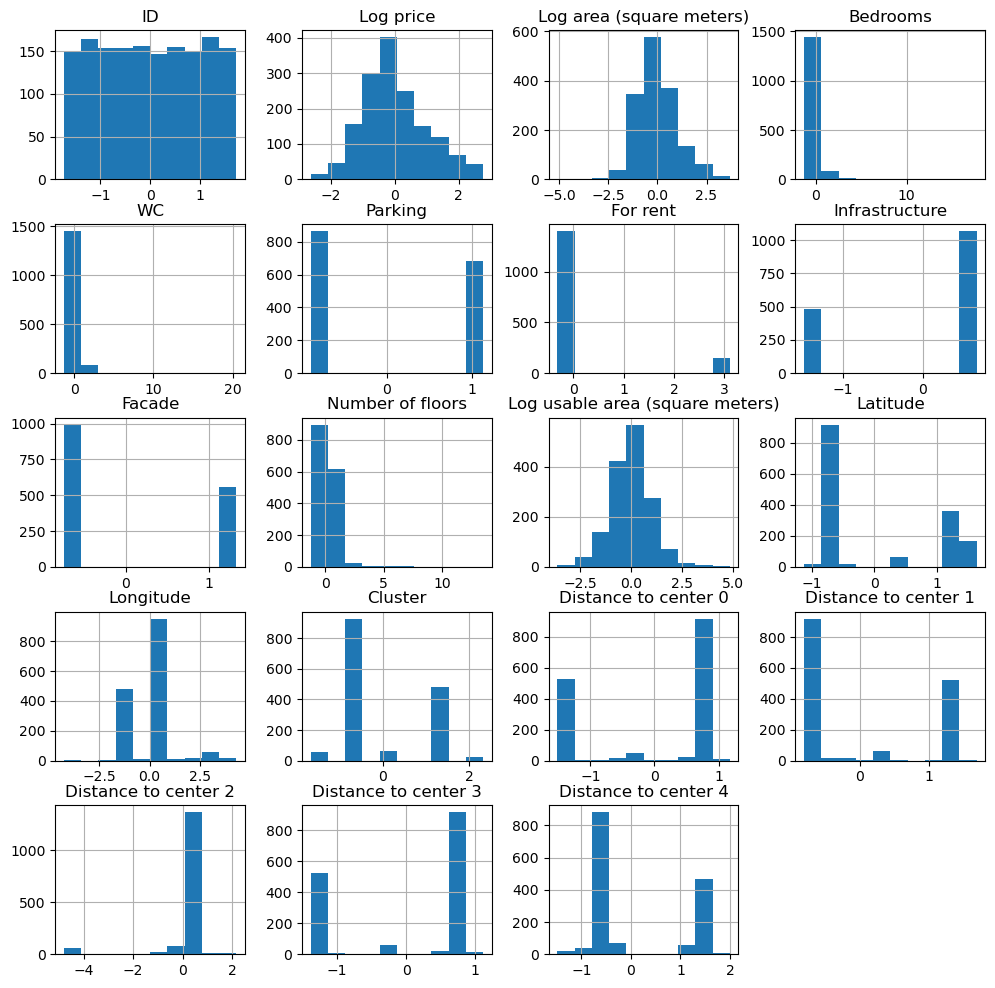

In [35]:
data.hist(figsize=(12, 12))
plt.show()

In [36]:
data.corr(numeric_only=True)

,ID,Log price,Log area (square meters),Bedrooms,WC,Parking,For rent,Infrastructure,Facade,Number of floors,Log usable area (square meters),Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1,Distance to center 2,Distance to center 3,Distance to center 4
ID,1.000000e+00,-0.016379,0.014643,-0.026392,-0.046307,-0.021767,0.013417,-0.004171,3.550333e-07,-0.058606,-0.030324,0.012167,0.021737,0.000541,-0.014407,0.013036,-0.058890,-0.012245,0.008072
Log price,-1.637869e-02,1.000000,0.462722,0.302964,0.305903,0.061810,0.120315,-0.037839,2.480052e-01,0.309108,0.568774,0.071455,-0.035737,0.039625,-0.072188,0.068097,0.038903,-0.070497,0.072656
Log area (square meters),1.464272e-02,0.462722,1.000000,0.217830,0.153797,-0.017268,0.103285,-0.039459,1.716004e-01,-0.038187,0.665212,-0.254761,0.292694,-0.230719,0.251219,-0.248741,-0.129388,0.263268,-0.281902
Bedrooms,-2.639233e-02,0.302964,0.217830,1.000000,0.812025,0.045758,0.157073,0.010205,3.806968e-02,0.536207,0.451231,0.073661,-0.040623,0.083992,-0.069454,0.072052,-0.030061,-0.072103,0.069213
WC,-4.630701e-02,0.305903,0.153797,0.812025,1.000000,0.083544,0.183690,0.011383,3.447687e-02,0.583467,0.440612,0.109007,-0.075519,0.122247,-0.103004,0.107094,-0.027546,-0.107378,0.106813
Parking,-2.176733e-02,0.061810,-0.017268,0.045758,0.083544,1.000000,-0.021804,-0.017113,-7.311108e-02,0.168508,0.125412,0.110368,-0.168298,0.132505,-0.105283,0.109396,0.102392,-0.115329,0.129904
For rent,1.341698e-02,0.120315,0.103285,0.157073,0.183690,-0.021804,1.000000,0.033798,2.735766e-02,0.121453,0.114561,-0.011804,0.043172,-0.000923,0.012897,-0.012599,-0.064675,0.013826,-0.021361
Infrastructure,-4.171229e-03,-0.037839,-0.039459,0.010205,0.011383,-0.017113,0.033798,1.000000,-3.601202e-03,0.041549,-0.002966,0.058890,-0.054979,0.064438,-0.057618,0.060434,0.011402,-0.060868,0.062141
Facade,3.550333e-07,0.248005,0.171600,0.038070,0.034477,-0.073111,0.027358,-0.003601,1.000000e+00,0.029087,0.144349,0.114975,-0.056318,0.069307,-0.118155,0.116020,0.018637,-0.115383,0.113416
Number of floors,-5.860650e-02,0.309108,-0.038187,0.536207,0.583467,0.168508,0.121453,0.041549,2.908694e-02,1.000000,0.643581,0.319292,-0.244970,0.303523,-0.314533,0.315822,0.027280,-0.323835,0.323786


In [37]:
data.corr()

,ID,Log price,Log area (square meters),Bedrooms,WC,Parking,For rent,Infrastructure,Facade,Number of floors,Log usable area (square meters),Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1,Distance to center 2,Distance to center 3,Distance to center 4
ID,1.000000e+00,-0.016379,0.014643,-0.026392,-0.046307,-0.021767,0.013417,-0.004171,3.550333e-07,-0.058606,-0.030324,0.012167,0.021737,0.000541,-0.014407,0.013036,-0.058890,-0.012245,0.008072
Log price,-1.637869e-02,1.000000,0.462722,0.302964,0.305903,0.061810,0.120315,-0.037839,2.480052e-01,0.309108,0.568774,0.071455,-0.035737,0.039625,-0.072188,0.068097,0.038903,-0.070497,0.072656
Log area (square meters),1.464272e-02,0.462722,1.000000,0.217830,0.153797,-0.017268,0.103285,-0.039459,1.716004e-01,-0.038187,0.665212,-0.254761,0.292694,-0.230719,0.251219,-0.248741,-0.129388,0.263268,-0.281902
Bedrooms,-2.639233e-02,0.302964,0.217830,1.000000,0.812025,0.045758,0.157073,0.010205,3.806968e-02,0.536207,0.451231,0.073661,-0.040623,0.083992,-0.069454,0.072052,-0.030061,-0.072103,0.069213
WC,-4.630701e-02,0.305903,0.153797,0.812025,1.000000,0.083544,0.183690,0.011383,3.447687e-02,0.583467,0.440612,0.109007,-0.075519,0.122247,-0.103004,0.107094,-0.027546,-0.107378,0.106813
Parking,-2.176733e-02,0.061810,-0.017268,0.045758,0.083544,1.000000,-0.021804,-0.017113,-7.311108e-02,0.168508,0.125412,0.110368,-0.168298,0.132505,-0.105283,0.109396,0.102392,-0.115329,0.129904
For rent,1.341698e-02,0.120315,0.103285,0.157073,0.183690,-0.021804,1.000000,0.033798,2.735766e-02,0.121453,0.114561,-0.011804,0.043172,-0.000923,0.012897,-0.012599,-0.064675,0.013826,-0.021361
Infrastructure,-4.171229e-03,-0.037839,-0.039459,0.010205,0.011383,-0.017113,0.033798,1.000000,-3.601202e-03,0.041549,-0.002966,0.058890,-0.054979,0.064438,-0.057618,0.060434,0.011402,-0.060868,0.062141
Facade,3.550333e-07,0.248005,0.171600,0.038070,0.034477,-0.073111,0.027358,-0.003601,1.000000e+00,0.029087,0.144349,0.114975,-0.056318,0.069307,-0.118155,0.116020,0.018637,-0.115383,0.113416
Number of floors,-5.860650e-02,0.309108,-0.038187,0.536207,0.583467,0.168508,0.121453,0.041549,2.908694e-02,1.000000,0.643581,0.319292,-0.244970,0.303523,-0.314533,0.315822,0.027280,-0.323835,0.323786


In [38]:
data.shape

(1548, 19)

In [39]:
X = data.drop("Log price", axis=1)
y = data["Log price"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=500)

In [40]:
X_train = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              Log price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     47.65
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          8.38e-122
Time:                        20:54:21   Log-Likelihood:                -1152.8
No. Observations:                1048   AIC:                             2344.
Df Residuals:                    1029   BIC:                             2438.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [41]:
X_train = X_train.drop("const", axis=1)
vif = return_vif(X_train)

In [42]:
r_squared = pd.DataFrame()
r_squared["columns"] = X_train.columns
r_squared["r2"] = [calculate_r_squared(df=X_train, column=column) for column in X_train.columns]
r_squared

,columns,r2
0,ID,0.019076
1,Log area (square meters),0.835335
2,Bedrooms,0.773262
3,WC,0.786348
4,Parking,0.094160
5,For rent,0.056672
6,Infrastructure,0.012129
7,Facade,0.085720
8,Number of floors,0.840148
9,Log usable area (square meters),0.894565


In [43]:
X_train.drop(columns=["Parking", "For rent", "Facade", "Infrastructure"], inplace=True)
return_vif(X_train)

,Features,VIF
0,ID,1.01209
1,Log area (square meters),5.93542
2,Bedrooms,4.39603
3,WC,4.65947
4,Number of floors,6.16141
5,Log usable area (square meters),9.29116
6,Latitude,1424.46539
7,Longitude,46.11191
8,Cluster,67.63474
9,Distance to center 0,6150.70141
